# Wine Quality Analysis

## Project Instructions

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

### Attribute Information:
#### Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

#### Output variable (based on sensory data):

12. quality (score between 0 and 10)

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_theme()     # Makes plot more stylish
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
wine_data = pd.read_csv("wine-dataset.csv")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


## Basic Analysis

We first use `info()` method to get the basic informarion about the columns in dataframe.

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


#### Observation:
- There are total of 12 columns in the dataset. The first 11 are input variables, and the quality is the output variable.
- All the columns are of type `float64`.
- There are total of 1599 entries or data points.

We now use the `describe()` method to find some useful information.

In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


#### Observation:
- In the pH column, the 25%, 50%, and 75% values are all `3.52`. This means that more than half of the values are `3.52`. It is better to further analyse this later.

## Data Cleaning

### 1. Checking for null values

In [5]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

#### Observation:
- There are total of 3 null values, in the columns `total sulfur dioxide`, `pH`, and `quality` respectively.

Since the number of null values (3) is very small compared to size of dataset (1599), these entried can be dropped.

In [6]:
wine_data.dropna(inplace=True)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


### 2. Checking for duplicate values

In [7]:
wine_data.duplicated().sum()

239

#### Observation:
- There are total of 239 duplucate values in the dataset. This might me because of several reasons:
    1. Due to merging of two datasets, as mentioned in the project instructions.
    2. Due to coincidence.

For now, we'll drop the duplicate values.

In [8]:
wine_data.drop_duplicates(inplace=True)
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1357 non-null   float64
 1   volatile acidity      1357 non-null   float64
 2   citric acid           1357 non-null   float64
 3   residual sugar        1357 non-null   float64
 4   chlorides             1357 non-null   float64
 5   free sulfur dioxide   1357 non-null   float64
 6   total sulfur dioxide  1357 non-null   float64
 7   density               1357 non-null   float64
 8   pH                    1357 non-null   float64
 9   sulphates             1357 non-null   float64
 10  alcohol               1357 non-null   float64
 11  quality               1357 non-null   float64
dtypes: float64(12)
memory usage: 137.8 KB


The dataset now contains 1357 entries, with no duplicate or null values.

### 3. Handling Outliers

We first check how the values in the `quality` column are distributed. We first check the unique values present in it.

In [9]:
wine_data['quality'].unique()

array([5., 6., 7., 4., 8., 3.])

There are 6 unique values in `quality` column: 3, 4, 5, 6, 7, and 8.
We use `histplot` to see how these values are distributed.

<AxesSubplot:xlabel='quality', ylabel='Count'>

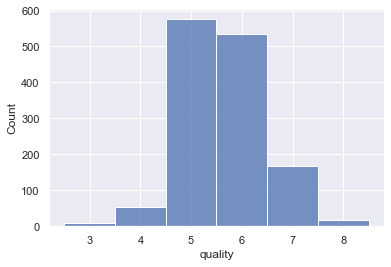

In [10]:
sns.histplot(data=wine_data, x='quality', discrete=True)

From the graph, we can see that the majority of `quality` values are 5 or 6 (>500 each). However, there are too few of other values. *This might lead to a problem when training the model.*

We can do one of the following:
1. Drop the few excellent or bad entries.
2. Change the `quality` of the few excellent or bad entries to their nearest values. (3 to 4 and 8 to 7)
3. Split the entries into 2 categories: `good` and `bad`

We will go with the 3rd option. All the wines with `quality <= 5` comes under bad category, and wines with `quality >= 6` under good category.

In [11]:
wine_data['category'] = 'bad'
wine_data['category'][wine_data['quality']>5] = 'good'
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,good
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.52,0.82,9.5,6.0,good
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0,bad


As shown above, a new column `category` had been added. We can see how many of each category we have by using `countplot()`

<AxesSubplot:xlabel='category', ylabel='count'>

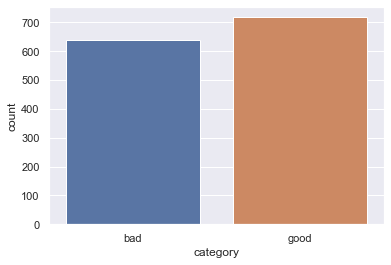

In [12]:
sns.countplot(data=wine_data, x='category')

We can see that we have roughly equal amount of good and bad wines.

We now view the boxplots for all other columns.

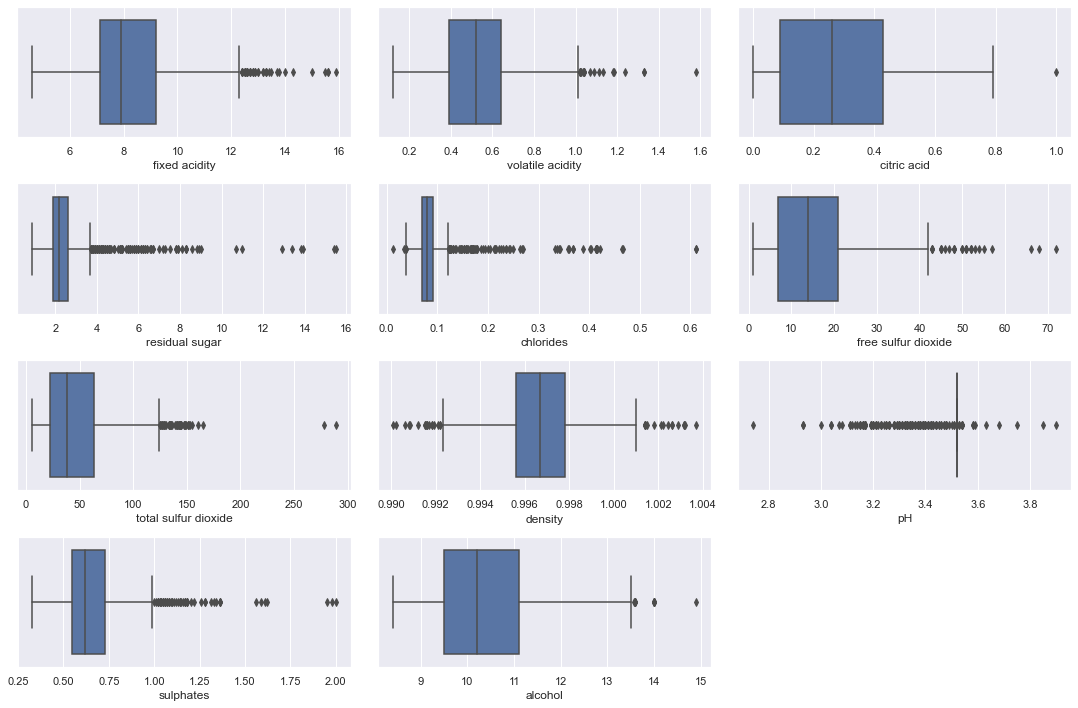

In [13]:
plt.figure(figsize=(15,10))
cols = wine_data.columns

for i in range(11):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=wine_data, x=cols[i])

plt.tight_layout()

#### Observation:
- There seems to be too many outliers. We can try plotting the histogram for the columns to see if we can understand something.

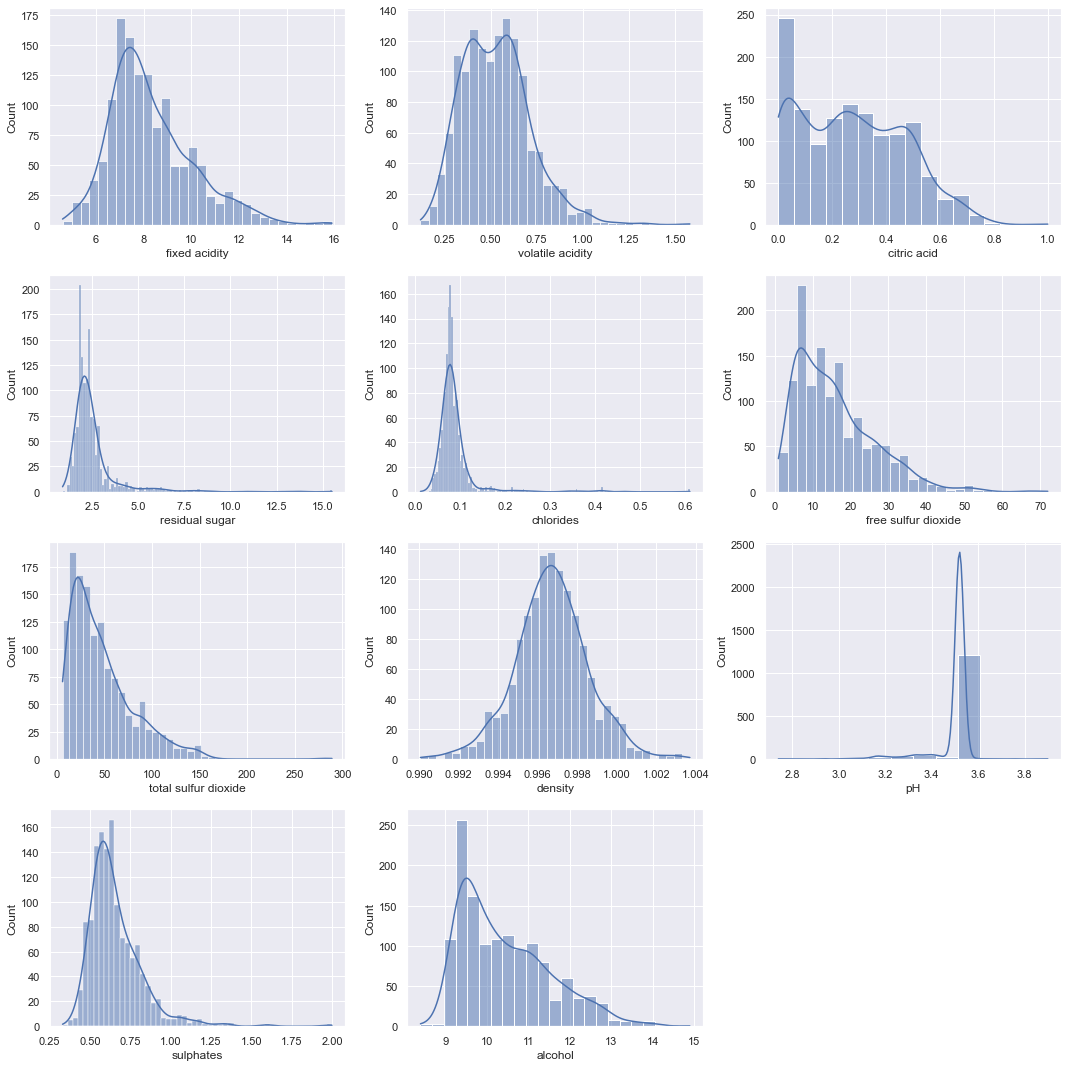

In [14]:
plt.figure(figsize=(15,15))
cols = wine_data.columns

for i in range(11):
    plt.subplot(4,3,i+1)
    sns.histplot(data=wine_data, x=cols[i], kde=True)

plt.tight_layout()

#### Observation:
1. The plots looks like normal distribution. Hence, it is better to identify outliers using the mean and standard deviation.

> Almost all of the pH values seems to be in between 3.5 and 3.6. We can increase the number of bins to get clear view.

<AxesSubplot:xlabel='pH', ylabel='Count'>

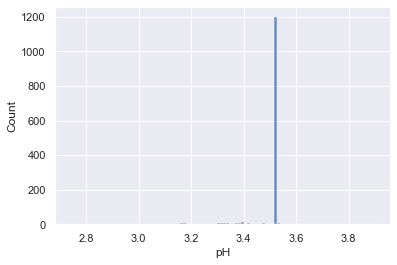

In [15]:
sns.histplot(data=wine_data, x='pH', bins=100)

> #### Observation:
There are 1200 entries with same `pH` value of around 3.5. This is more than 85% of the dataset. The pH of a typical wine ranges from 3 to 4. ***Hence, This is clearly due to an error in the dataset.***
>  
> In a practical case of this type, we have 2 solutions:
> 
> 1. Re-collect the data.
> 2. Drop the column.
> 
> Since we cannot recollect the data, we will drop it.

In [16]:
wine_data.drop('pH', axis=1, inplace=True)

We now define a function `handle_outliers()` to handle the outliers. When using mean and standard deviation dor finding outliers, we use following formulas:

$
lower=mean-std*3\\
upper=mean+std*3
$

In [17]:
def handle_outliers(data, col):
    mean = data[col].mean()
    std = data[col].std()
    lower = mean - std * 3
    upper = mean + std * 3
    
    data[col][data[col] < lower] = lower
    data[col][data[col] > upper] = upper

Call this function for every column in the dataset.

In [18]:
wine_data_capped = wine_data.copy()
cols = wine_data.columns

for i in range(len(cols)-2):
    handle_outliers(wine_data_capped, cols[i])

Plot the histograms once again.

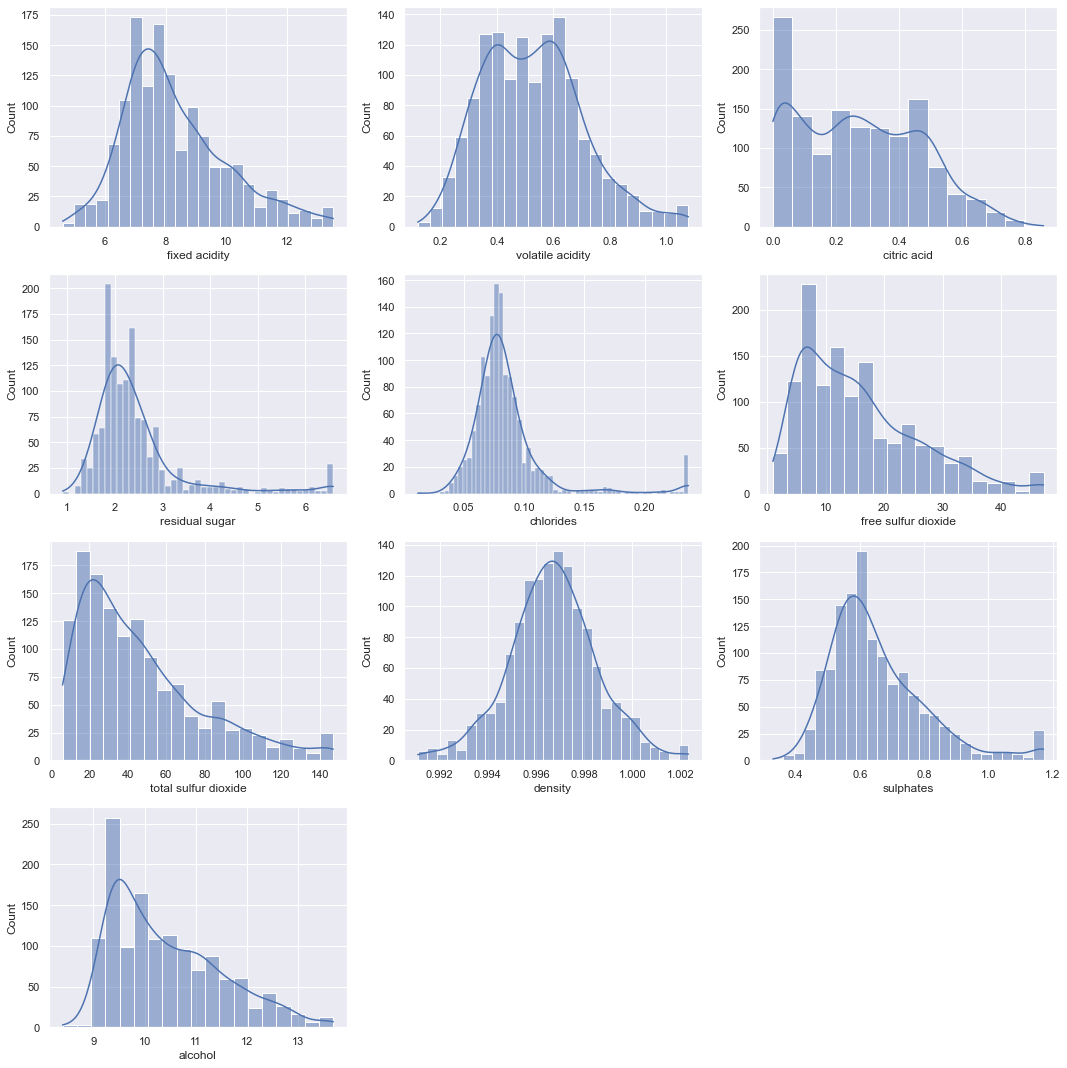

In [19]:
plt.figure(figsize=(15,15))
cols = wine_data_capped.columns

for i in range(10):
    plt.subplot(4,3,i+1)
    sns.histplot(data=wine_data_capped, x=cols[i], kde=True)

plt.tight_layout()

All the outliers have been removed.

## Exploratory Data Analysis
In this section, we will try to answer several questions by visualising the data.

### 1. What is the relationship between fixed acidity and volatile acidity?

<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

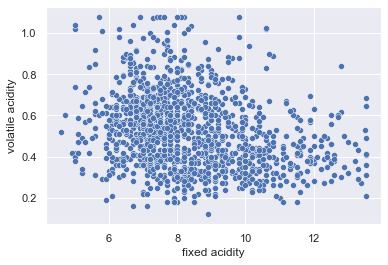

In [20]:
sns.scatterplot(data=wine_data_capped, x='fixed acidity', y='volatile acidity')

#### Insights:
- There is a slight decrease in the `volatile acidity` as the `fixed acidity` increases, i.e., they are negatively correlated.

### 2. What is the relationship between fixed acidity and citric acid?

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

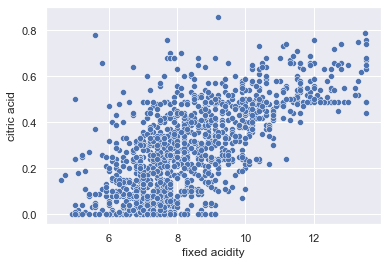

In [21]:
sns.scatterplot(data=wine_data_capped, x='fixed acidity', y='citric acid')

#### Insights:
- There is clear increase in `fixed acidity` as the `citric acid` increases. This is because citric acid comes under fixed acids.

### 3. What is relationship between total sulfur dioxide and free sulfur dioxide?

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

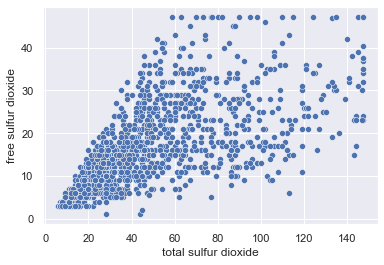

In [22]:
sns.scatterplot(data=wine_data_capped, x='total sulfur dioxide', y='free sulfur dioxide')

#### Insights:
- The `free sulfur dioxide` and `total sulfur dioxide` are highly correlated, i.e., one increases when the other increases.
- However, as the values increase, they are more spread out.

### 4. How are total sulfur dioxide and sulphates related to each other?

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='sulphates'>

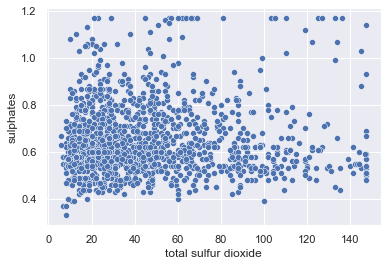

In [23]:
sns.scatterplot(data=wine_data_capped, x='total sulfur dioxide', y='sulphates')

#### Insights:
- There does not seem to be any clear relation between total sulfur dioxide and sulphates.

### 5. What is the relationship between alcohol and quality?

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

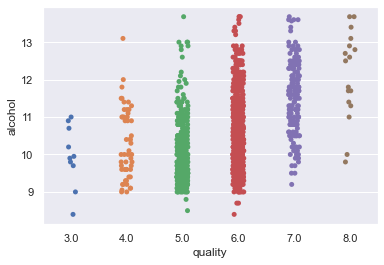

In [24]:
sns.stripplot(data=wine_data_capped, x='quality', y='alcohol')

#### Insights:
- The `quality` seems to increase as the `alcohol` increases.

### 6. What is the relation between density and quality?

<AxesSubplot:xlabel='quality', ylabel='density'>

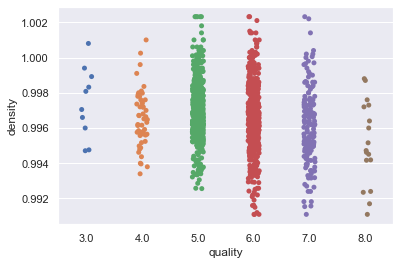

In [25]:
sns.stripplot(data=wine_data_capped, x='quality', y='density')

#### Insights:
- The `density` decreases slightly as the `quality` increases.

### 7. What is the correlation between the columns?

<AxesSubplot:>

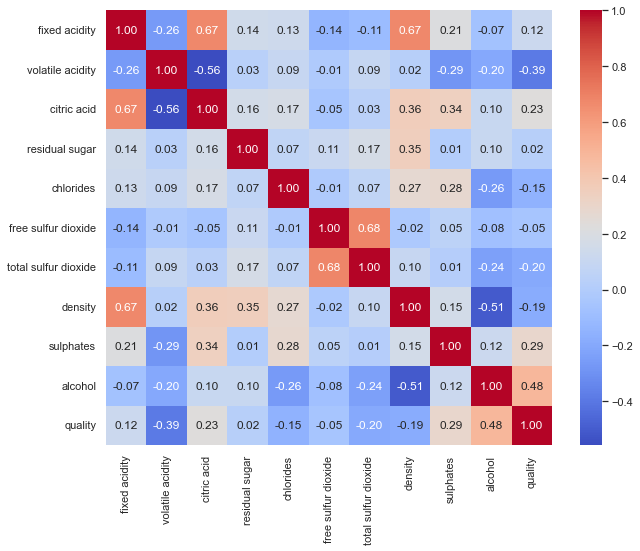

In [26]:
corr = wine_data_capped.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

#### Insights:
- The `quality` is strongly correlated to `alcohol`, `volatile acidity`, and `sulphates`.
- `fixed acidity` is highly correlated to `citric acid` and `density`.
- `total sulfur dioxide` and `free sulfur dioxide` are highly correlated.
- `density` and `alcohol` are negatively correlated.

## Model Building

### 1. Splitting into train and test data:

We first seperate the data set into inputs (`X`) and output (`y`). `y` contains 2 values: `0` for bad, `1` for good wines.

In [27]:
X = wine_data_capped.iloc[:,:10]
y = (wine_data_capped['category'] == 'good').astype('int64')

We them split `X` and `y` into train and test datasets.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

We then apply `StandardScaler` to the train and test data. This makes the data uniform and easy to train on.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2. Model Training:

We have tried many models, and out of them, `Support Vector Machine` model got the highest score. To use it, we import the `SVC` from `sklearn.svm`.

In [30]:
from sklearn.svm import SVC

model = SVC()

We then fit the model, and predict the outputs for the test data.

In [31]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

### 3. Model Evaluation

To evaluate the model, we first use the `confusion_matrix` and `classification_report`.

The confusion matrix gives for each category, how many are predicted correctly and how many are not.

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

[[ 98  27]
 [ 39 108]]


              precision    recall  f1-score   support

           0       0.72      0.78      0.75       125
           1       0.80      0.73      0.77       147

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



We now use the `accuracy_score` to find the accuracy of the predictions.

In [33]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(y_test, pred)
print("Accuracy of Model is: ", model_acc)

Accuracy of Model is:  0.7573529411764706


As we can see, we got 75% accuracy on the test data. We can see accuracy on train data to find whether the model has overfit.

In [34]:
pred_ = model.predict(X_train)
model_acc_ = accuracy_score(y_train, pred_)
print("Accuracy of Model is: ", model_acc_)

Accuracy of Model is:  0.7953917050691244


The accuracy have increased to 79%. However, this is just a small increase, so we can say that the model have not overfit.

## Conclusion:
We have successfully analysed the data, handled the outliers and missing values, and built a model to predict the quality of the wine, with 75% accuracy.